In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to the classes
Measurement = Base.classes.measurement
Station = Base.classes.station


In [6]:
# View all of the classes that automap found
print(Base.classes.keys())

['measurement', 'station']


In [7]:
# Save references to the classes
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).scalar()

print("Most recent date in the dataset:", most_recent_date)

Most recent date in the dataset: 2017-08-23


<Figure size 2000x1000 with 0 Axes>

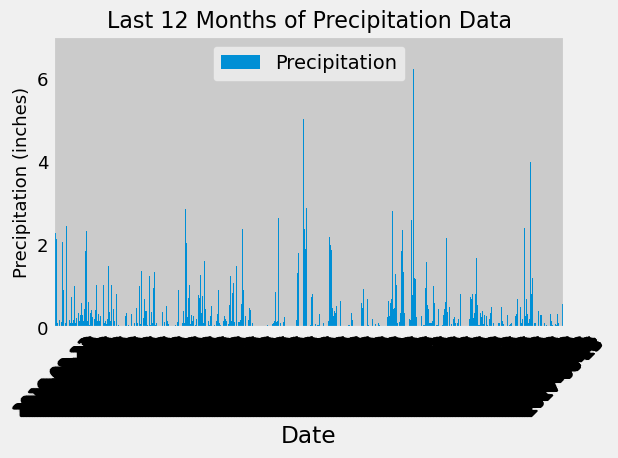

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 
most_recent_date = session.query(func.max(Measurement.date)).scalar()
twelve_months_ago = pd.to_datetime(most_recent_date) - pd.DateOffset(months=12)

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= twelve_months_ago.strftime('%Y-%m-%d')).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(results, columns=['Date', 'Precipitation'])
df.set_index('Date', inplace=True)

# Sort the dataframe by date
df.sort_index(inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(20, 10))
df.plot(kind='bar', width=3)
plt.title("Last 12 Months of Precipitation Data", fontsize = 16)
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)", fontsize = 13)
plt.xticks(rotation=45, fontsize = 13)
plt.yticks(fontsize = 13)
plt.tight_layout()
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = df['Precipitation'].describe()
summary_stats

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).scalar()

print("Total number of stations:", total_stations)

Total number of stations: 9


In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)

most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                        group_by(Measurement.station).\
                        order_by(func.count(Measurement.station).desc()).all()
# List the stations and their counts in descending order.
print("Most active stations (descending order):")
for station, count in most_active_stations:
    print(f"Station ID: {station}, Number of Rows: {count}")

Most active stations (descending order):
Station ID: USC00519281, Number of Rows: 2772
Station ID: USC00519397, Number of Rows: 2724
Station ID: USC00513117, Number of Rows: 2709
Station ID: USC00519523, Number of Rows: 2669
Station ID: USC00516128, Number of Rows: 2612
Station ID: USC00514830, Number of Rows: 2202
Station ID: USC00511918, Number of Rows: 1979
Station ID: USC00517948, Number of Rows: 1372
Station ID: USC00518838, Number of Rows: 511


In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_id = most_active_stations[0][0]

# Query to calculate lowest, highest, and average temperature for the most active station
query_result = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
               filter(Measurement.station == most_active_station_id).all()

# Extract the results
lowest_temp, highest_temp, avg_temp = query_result[0]

In [15]:
print(lowest_temp)
print(highest_temp)
print(avg_temp)

54.0
85.0
71.66378066378067


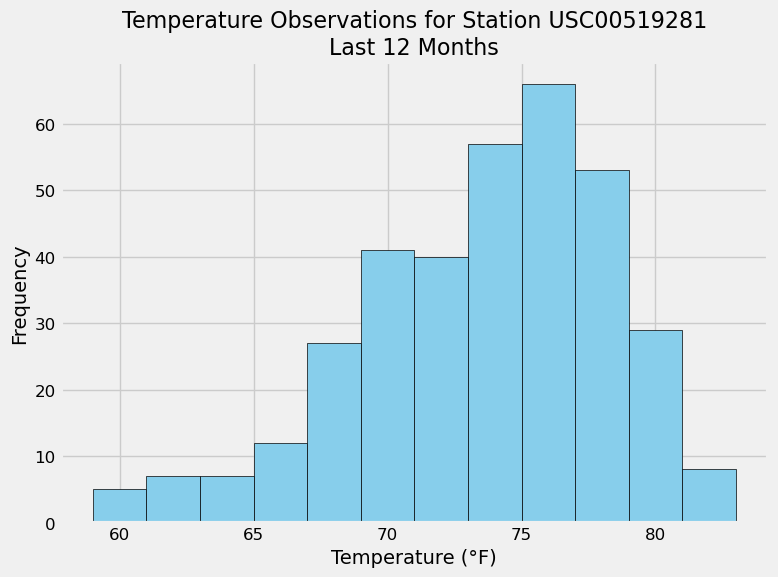

In [16]:
# Using the most active station id

# Calculate the date 12 months ago from the most recent date
most_recent_date = session.query(func.max(Measurement.date)).scalar()
twelve_months_ago = pd.to_datetime(most_recent_date) - pd.DateOffset(months=12)

# Convert the timestamp to string in the format 'YYYY-MM-DD'
twelve_months_ago_str = twelve_months_ago.strftime('%Y-%m-%d')

# Query temperature observations for the last 12 months for the most active station
results = session.query(Measurement.tobs).\
            filter(Measurement.station == "USC00519281").\
            filter(Measurement.date >= twelve_months_ago_str).all()

# Extract temperature observations into a list
temperatures = [result[0] for result in results]

# Plot the results as a histogram
plt.figure(figsize=(8, 6))
plt.hist(temperatures, bins=12, color='skyblue', edgecolor='black')
plt.title("Temperature Observations for Station USC00519281\nLast 12 Months", fontsize=16)
plt.xlabel("Temperature (°F)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Close Session

In [17]:
# Close Session
session.close()